An electromagnetic simulation, with initial code and ideas borrowed from
 * Understanding the Finite-Difference Time-Domain Method, John B. Schneider, http://www.eecs.wsu.edu/~schneidj/ufdtd, 2010.
## 3. For the boundary conditions, write down the expressions for the below and show them for the sinsoidal excitation above: (a) PEC boundary at the right side, (b) PMC boundary at the right side,(3) Set the maxTime parameter to 1000 to visualise the effect of the different boundary conditions above.

### (a) PEC boundary at the right side


* The boundary conditions is $ez[(SIZE-1)] = 0.0$.

Firstly, the electric field Ez is shown as follows.

In [1]:
# Initialization
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# set parametres, including characteristic impedance, the size of space, time and source.
imp0 = 377.0 # property of free space (vacuum)
SIZE = 400 # dimension of space to model
sensorLocation = 250 # location of output sensor
maxTime = 700 # simulation time

sourcePeakTime = 30 # peak of the Gaussian source
sourceSdv = 7 # standard deviation of the Gaussian source
sourceSigma = 2 * sourceSdv**2

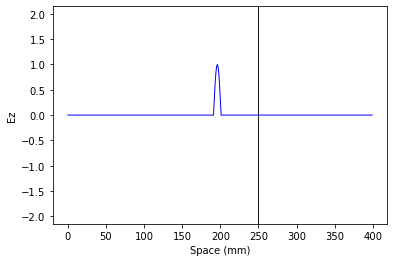

In [2]:
ims = []  
ims_hy = []  
# set up a plot
fig,ax = plt.subplots()
ax.axvspan(250, 250, alpha=0.9, color='black') # the position of sensor
ax.set_xlabel('Space (mm)')
ax.set_ylabel('Ez')

# initialize electric and magnetic field
ez = [0.0] * SIZE
hy = [0.0] * SIZE

# free space
epsR = [1.0] * SIZE


newMaxTime=1000 # set a new time
# do time stepping
for n in range(newMaxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0
    
    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]
    # capture a snapshot of the ez field at this timestep to the animation
    ims.append((plt.plot(range(SIZE), ez, color='blue', linewidth=1)))

    # hardwire a source node: sinusoidal excitation
    if n>=1 and n <=10:
        ez[0] = math.sin(n*math.pi/10)
    else:
        ez[0] = 0.0
    ## set PEC Boundaries at the right side
    ez[(SIZE-1)] = 0.0 

#done with time stepping loop

#build and display the animation
im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=5000, blit=True)
HTML(im_ani.to_jshtml())

From the picture above, we can see that the sign of the electric field changes when it reflects from the PEC wall compared with that of incident field. 

Then, magnetic field Hy is shown as follows.

In [ ]:
ims = []  
ims_hy = []  
# set up a plot
fig, ax, = plt.subplots()
ax.axvspan(250, 250, alpha=0.9, color='black') # sensor
ax.set_xlabel('Space (mm)')
ax.set_ylabel('hy')

# initialize electric and magnetic field
ez = [0.0] * SIZE
hy = [0.0] * SIZE

# free space
epsR = [1.0] * SIZE

newMaxTime=1000 # set a new time 
# do time stepping
for n in range(newMaxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0
    # capture a snapshot of the hy field at this timestep to the animation
    ims_hy.append(( plt.plot(range(SIZE), hy, color='brown', linewidth=1)))
    
    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]
    
    # hardwire a source node: sinusoidal excitation
    if n>=1 and n <=10:
        ez[0] = math.sin(n*math.pi/10)
    else:
        ez[0] = 0.0
    ## PEC Boundaries at the right side 
    ez[(SIZE-1)] = 0.0 

#done with time stepping loop

#build and display the animation
# magnetic field
im_ani_hy = animation.ArtistAnimation(fig, ims_hy, interval=50, repeat_delay=5000, blit=True)
HTML(im_ani_hy.to_jshtml())




For magnetic field, when it arrives at the PEC wall and reflects, it wouldn't change its sign.

### (b) PMC boundary at the right side 


* The boundary conditions is $hy[(SIZE-1)]$ = 0.0

Firstly, the result of electric field when it arrives at the PMC wall is shown as follows.

In [ ]:
ims = []  
ims_hy = []  
# set up a plot
fig, ax = plt.subplots()
ax.axvspan(250, 250, alpha=0.9, color='black') # sensor
ax.set_xlabel('Space (mm)')
ax.set_ylabel('Ez')

# initialize electric and magnetic field
ez = [0.0] * SIZE
hy = [0.0] * SIZE

# free space
epsR = [1.0] * SIZE

newMaxTime=1000 # set a new time
# do time stepping
for n in range(newMaxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0
    
    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]
    # capture a snapshot of the ez field at this timestep to the animation
    ims.append((plt.plot(range(SIZE), ez, color='blue', linewidth=1)))
        
    # hardwire a source node */
    if n>=1 and n <=10:
        ez[0] = math.sin(n*math.pi/10)
    else:
        ez[0] = 0.0
    ## set PMC Boundaries at the right side
    hy[(SIZE-1)] = 0.0 
        
#done with time stepping loop

#build and display the animation
im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=5000, blit=True)
HTML(im_ani.to_jshtml())



From the picture shown above, we can see that the electric field wouldn't change its sign at the right side because it is a PMC wall. But the electric field is inverted at the left side because the left wall is set as PEC wall.

Then, magnetic field simulation is shown below.

In [ ]:
ims = []  
ims_hy = []  
# set up a plot
fig, ax, = plt.subplots()
ax.axvspan(250, 250, alpha=0.9, color='black') # sensor
ax.set_xlabel('Space (mm)')
ax.set_ylabel('hy')

# initialize electric and magnetic field
ez = [0.0] * SIZE
hy = [0.0] * SIZE

# free space
epsR = [1.0] * SIZE

newMaxTime=1000 # set a new time up to 1000
# do time stepping
for n in range(newMaxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0
    # capture a snapshot of the hy field at this timestep to the animation
    ims_hy.append(( plt.plot(range(SIZE), hy, color='brown', linewidth=1)))
    
    # update electric field
    for i in range(SIZE):
        ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]

    # hardwire a source node */
    if n>=1 and n <=10:
        ez[0] = math.sin(n*math.pi/10)
    else:
        ez[0] = 0.0
    ## set PMC Boundary at the right side
    hy[(SIZE-1)] = 0.0 

#done with time stepping loop

#build and display the animation
# magnetic field
im_ani_hy = animation.ArtistAnimation(fig, ims_hy, interval=50, repeat_delay=5000, blit=True)
HTML(im_ani_hy.to_jshtml())



As it is shown above, when magnetic field reflects from the PMC wall at the right side, it changes its sign. When magnetic field reflects from the PEC wall at the left side, it isn't inverted.